In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

# 1.1从 csv 文件中读取数据

你可以用`read_csv`函数来直接度csv文件，默认情况下，文件是用逗号分割字段。

接下来我们来看看蒙特利尔的一份骑车数据。这是[原始页面](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (法语的),这份数据已经包括在本目录中了。我们使用的是2012年的数据。

这份数据集记录了蒙特利尔市七条自行车道上每天有多少人。

In [2]:
broken_df = pd.read_csv('../data/bikes.csv')

In [3]:
# 先看下前三行
broken_df[:3]

,Date;Berri 1;Br�beuf (donn�es non disponibles);C�te-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (donn�es non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


显然，数据有问题！ 还好，`read_csv`函数有一系列的选项来解决这些问题：

* 将字段分隔符改为`;`
* 修改编码格式为`'latin1'` (默认是 `'utf8'`)
* 处理下 'Date'字段的日期格式
* 告诉pandas日期的格式是“天”在前而不是“月”在前
* 将Date列设为索引（Index）

In [4]:
fixed_df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


# 1.2 选取一列

读取CSV文件后，你得到的是一个叫`DataFrame`的数据结构，其由行和列构成。获取其中某一列数据的方式就跟你获取字典结构中某一key的value一样：

In [5]:
fixed_df['Berri 1']

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
2012-01-06    146
2012-01-07     98
2012-01-08     95
2012-01-09    244
2012-01-10    397
2012-01-11    273
2012-01-12    157
2012-01-13     75
2012-01-14     32
2012-01-15     54
...
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10-28    1310
2012-10-29    2919
2012-10-30    2887
2012-10-31    2634
2012-11-01    2405
2012-11-02    1582
2012-11-03     844
2012-11-04     966
2012-11-05    2247
Name: Berri 1, Length: 310

# 1.3 对一列数据画图

直接用`.plot()`就搞定，敢不敢再简单点！=

可以看到，显然，一二三月没多少人骑车～

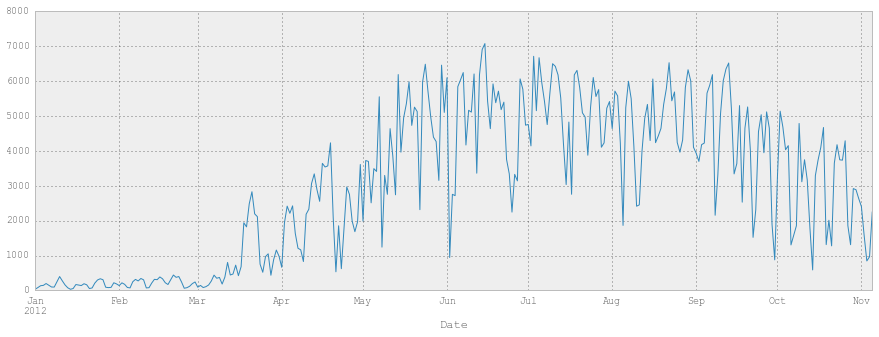

In [6]:
_ = fixed_df['Berri 1'].plot()

此外，我们可以把所有列数据都在一张图上画出来。可以看到，所有折线都挤在一起了，不过所有折线的趋势都是一样的——废话。。。如果天气不好的话，所有自行车道上的人都会很少。

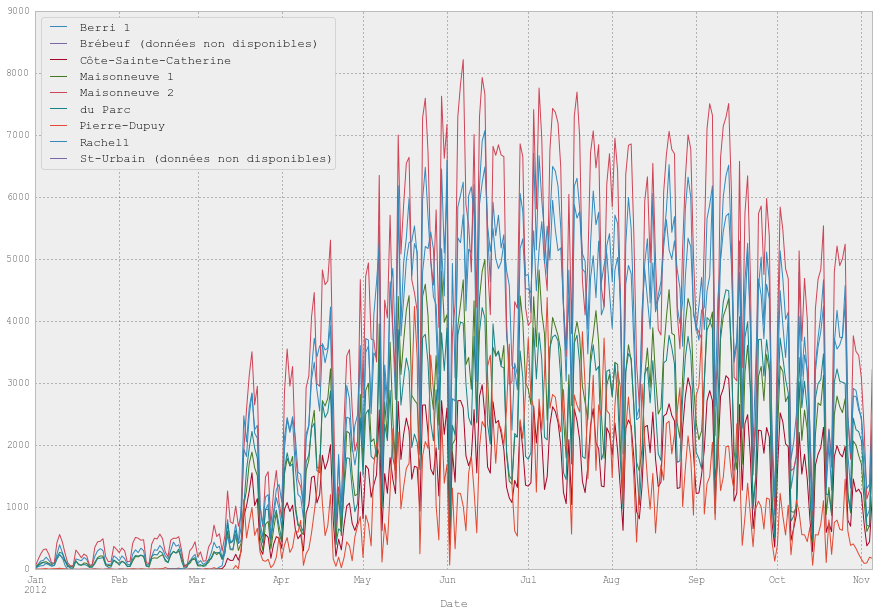

In [7]:
_ = fixed_df.plot(figsize=(15, 10))

# 1.4 把所有的都放在一起

下面两句话就是将画图所需要的全部代码：

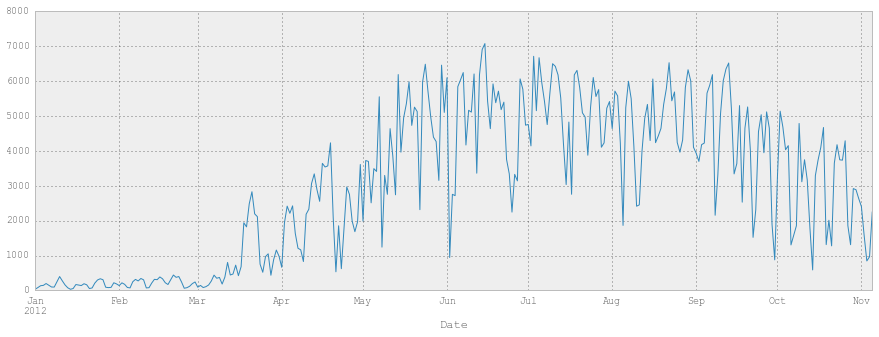

In [8]:
df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
_ = df['Berri 1'].plot()

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  